In [53]:
# Import dependencies

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np
import scipy as sci
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #This line is necessary on macbook s.t. models compile
import os

plt.style.use('seaborn-colorblind')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
training = pd.read_csv('Training.csv')
testing = pd.read_csv('Testing.csv')

In [23]:
training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [24]:
training = training.dropna(axis = 1)
training.shape

(4920, 133)

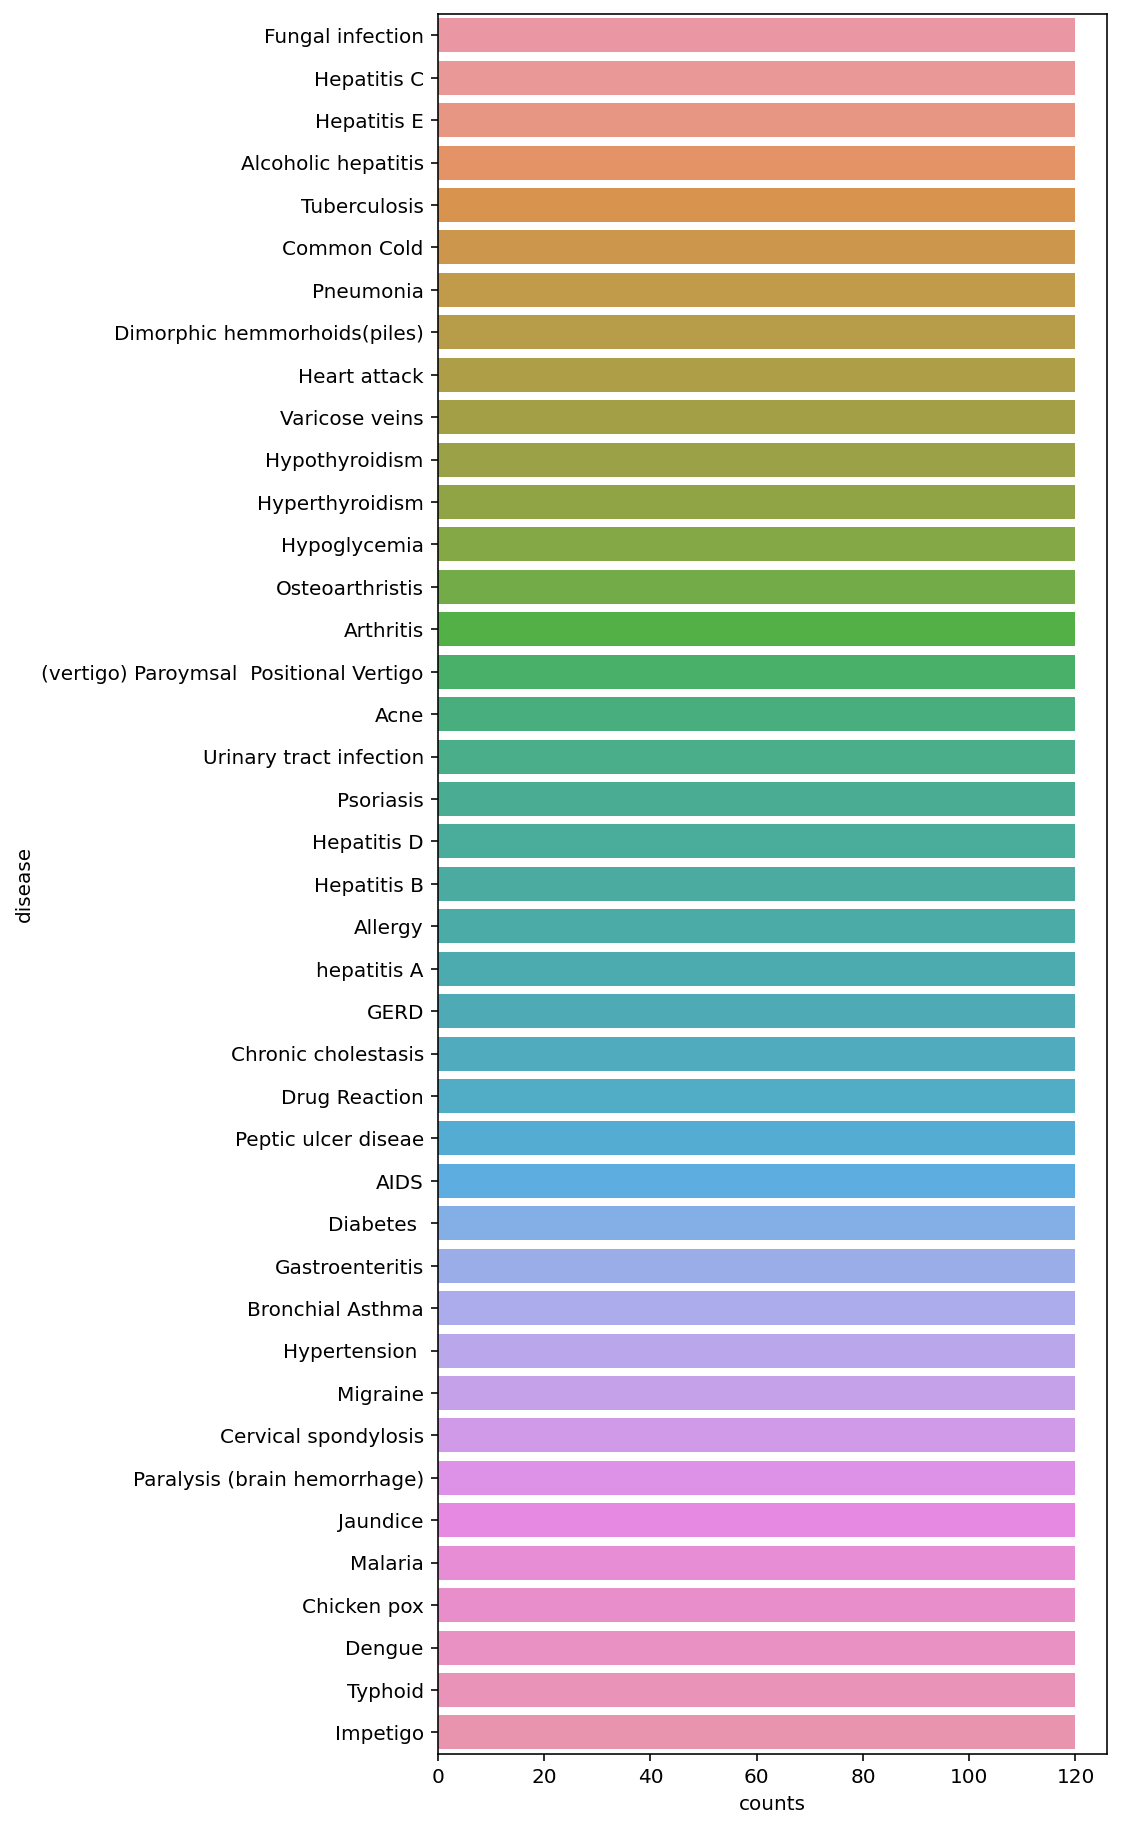

In [25]:
# Check whether the training dataset is balanced
disease_counts = training['prognosis'].value_counts()
temp_df = pd.DataFrame({
    'disease': disease_counts.index,
    'counts': disease_counts.values
})

plt.figure(figsize = (6,16))
sns.barplot(y = 'disease', x = 'counts',  data = temp_df)
plt.show()

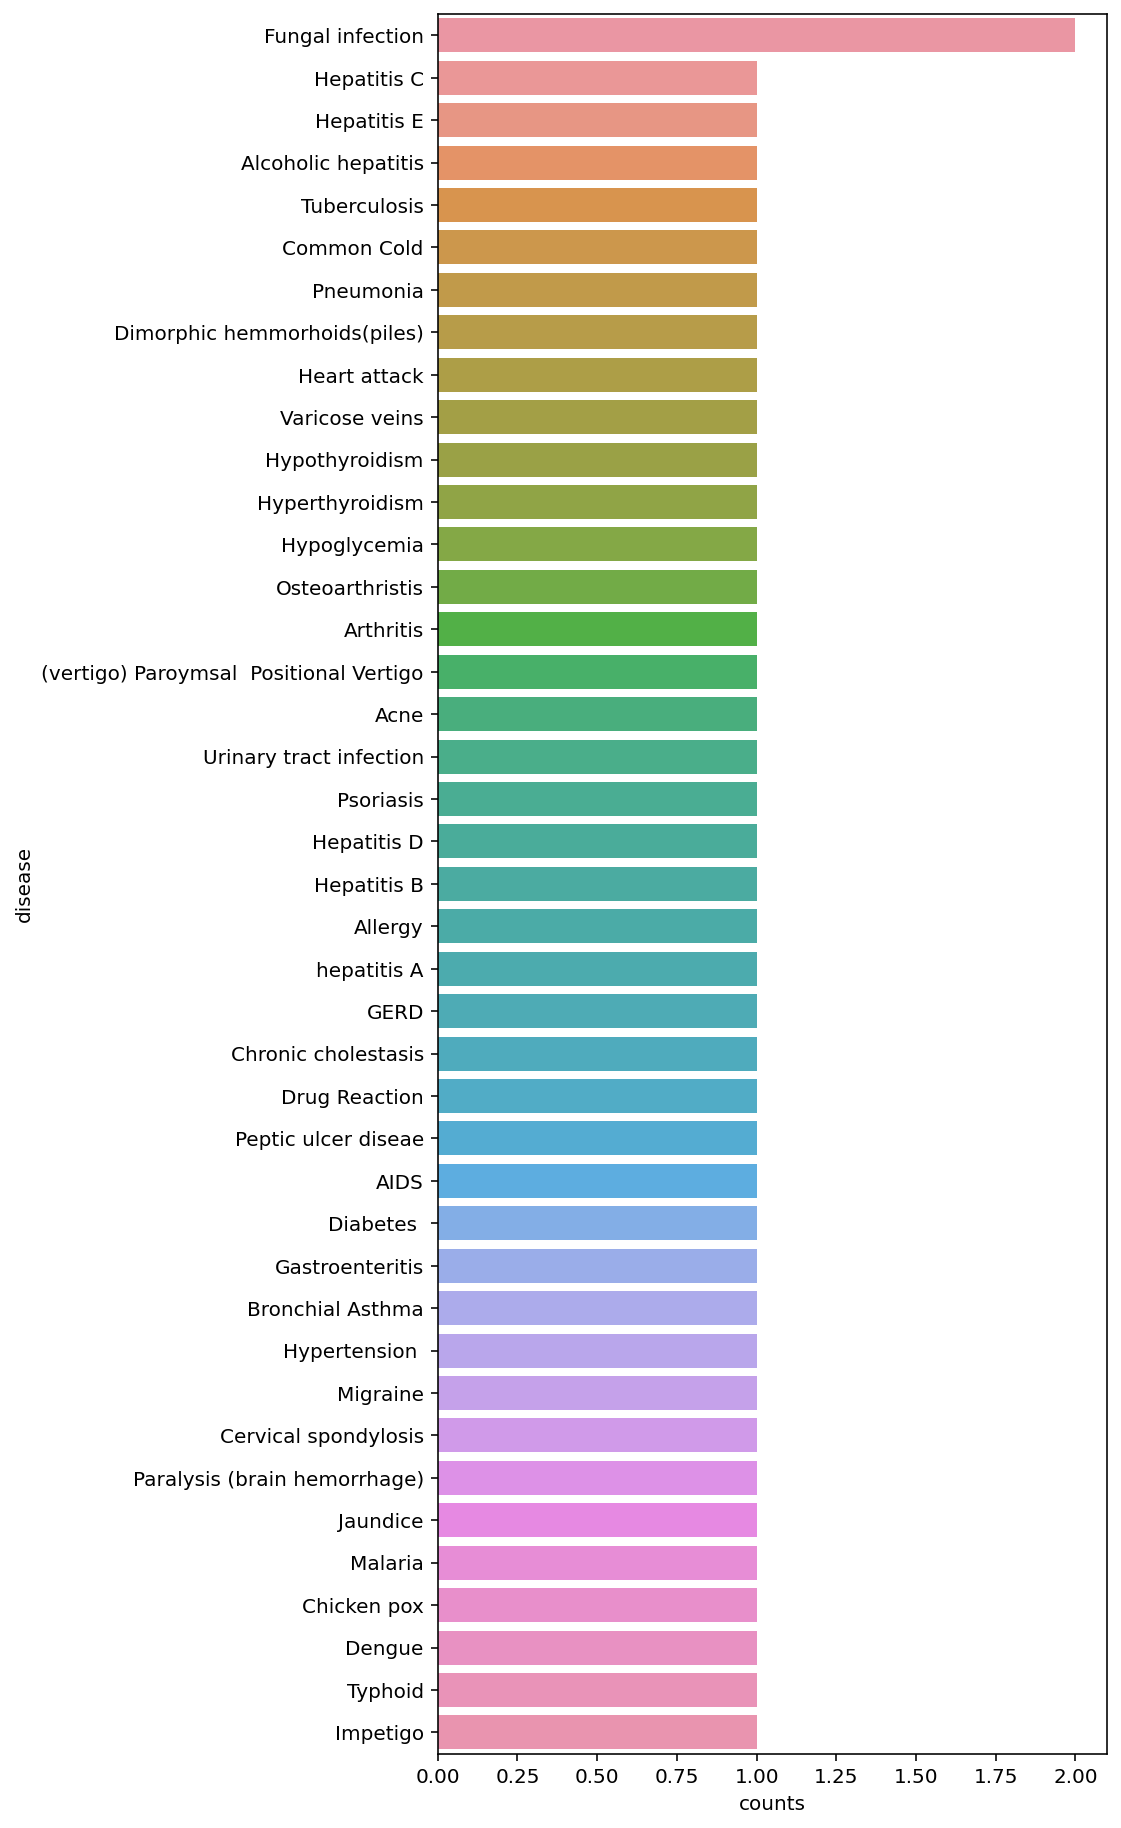

In [27]:
# Check whether the test dataset is balanced
disease_counts = testing['prognosis'].value_counts()
temp_df = pd.DataFrame({
    'disease': disease_counts.index,
    'counts': disease_counts.values
})

plt.figure(figsize = (6,16))
sns.barplot(y = 'disease', x = 'counts',  data = temp_df)
plt.show()

In [28]:
testing.shape

(42, 133)

In [29]:
# Encoding the target values into numerical labels instead of strings
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

training['prognosis'] = encoder.fit_transform(training['prognosis'])
testing['prognosis'] = encoder.fit_transform(testing['prognosis'])

In [30]:
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


In [33]:
X = training.iloc[:,:-1]
y = training.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


Here we will be using three different models for our predictions, Support Vector Classifier, Gaussian Naive Bayes, and Random Forest Classifier

We will combine this with a K-fold Cross-Validation to select our model

In [38]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
# Scoring for our cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC": SVC(),
    "Gauss NB": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

# Produce a score for each model
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gauss NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data using SVM Classifier : 100.0
Accuracy on test data using SVM Classifier : 100.0


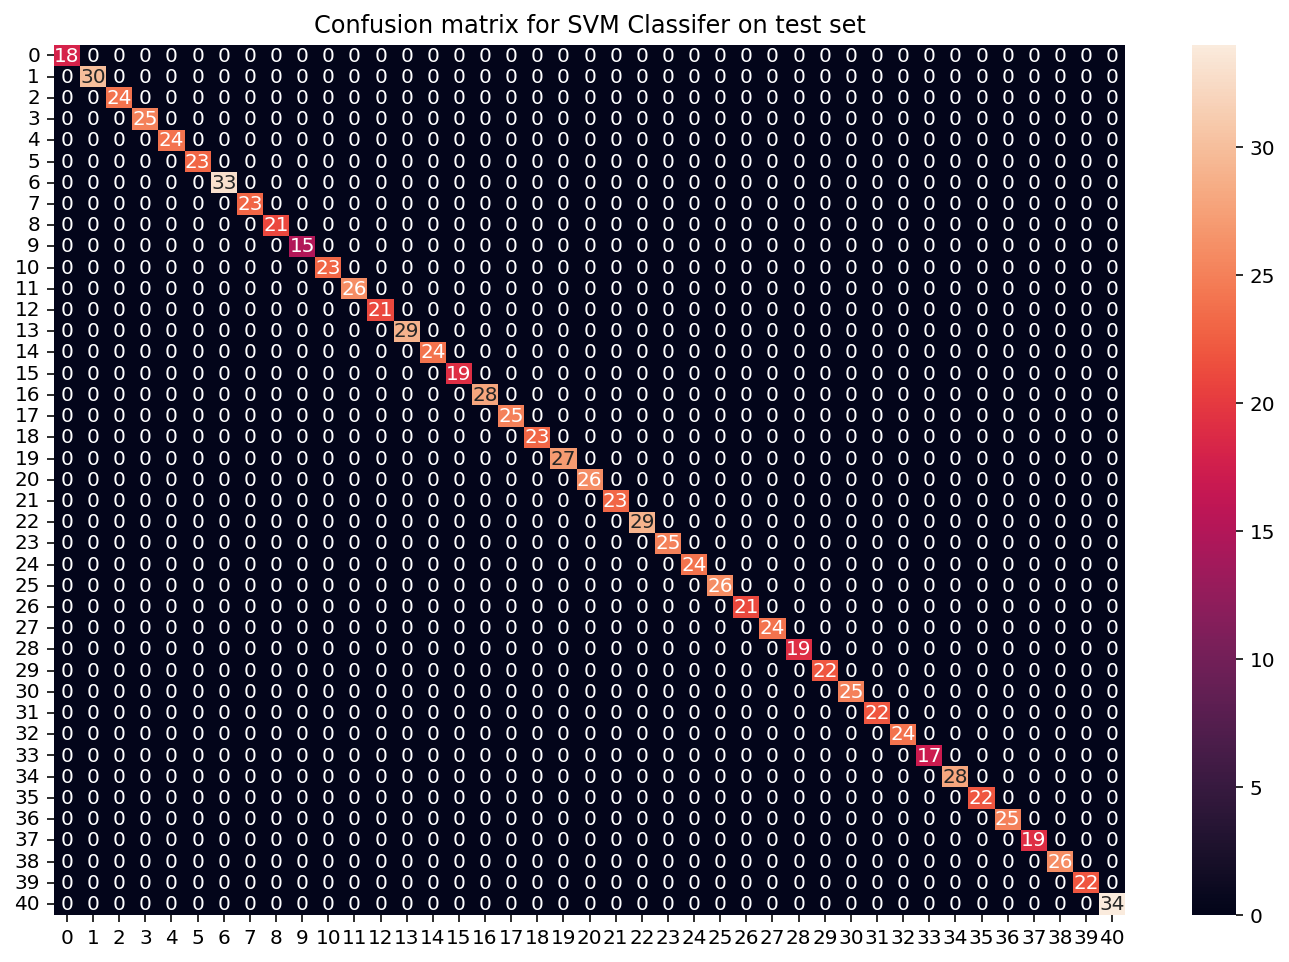

Accuracy on train data using Gaussian Naive Bayes Classifier : 100.0
Accuracy on test data using Gaussian Naive Bayes Classifier : 100.0


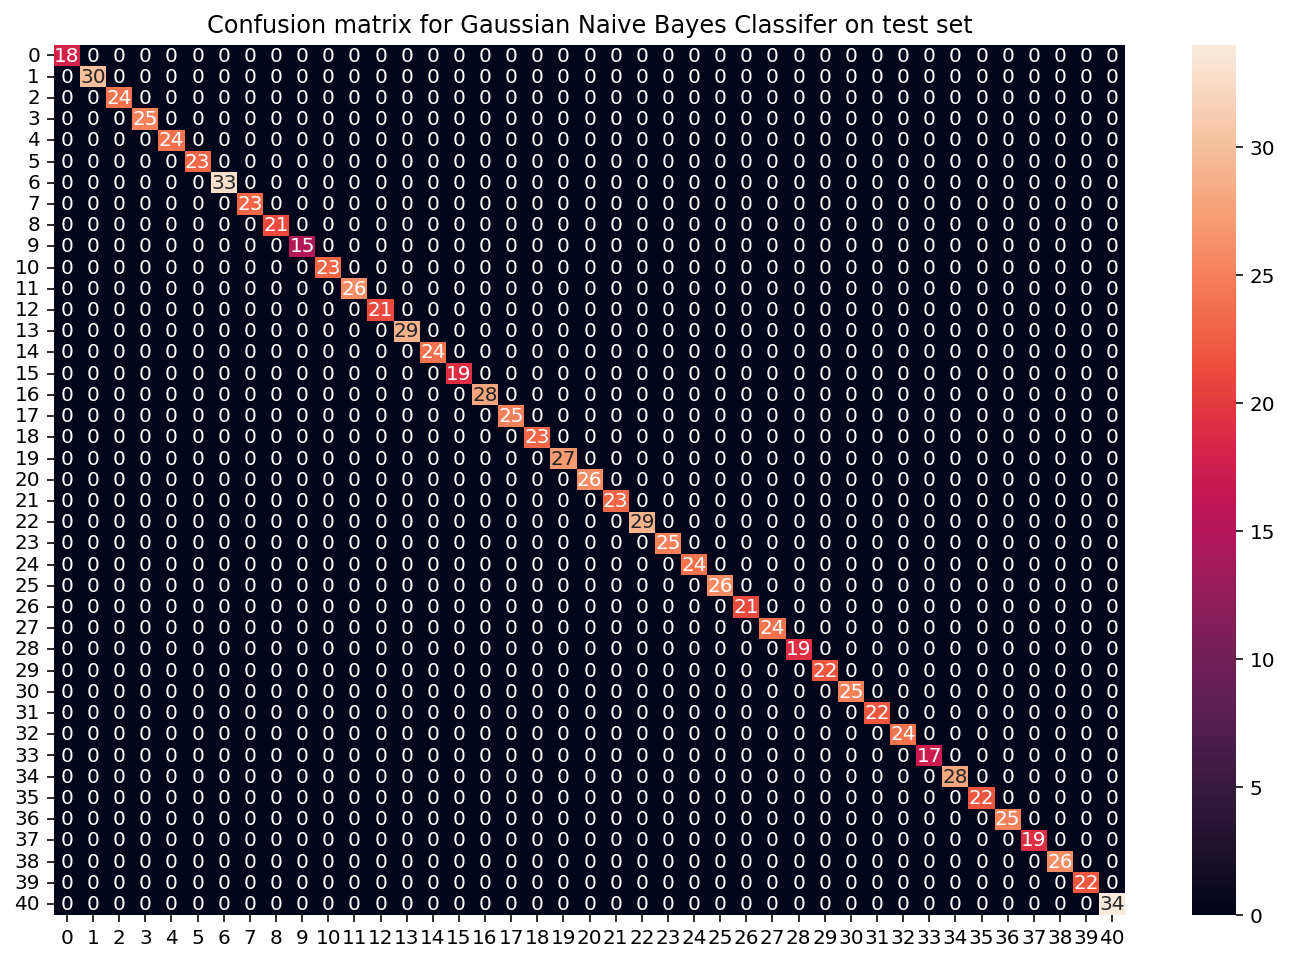

Accuracy on train data using Random Forest Classifier : 100.0
Accuracy on test data using Random Forest Classifier : 100.0


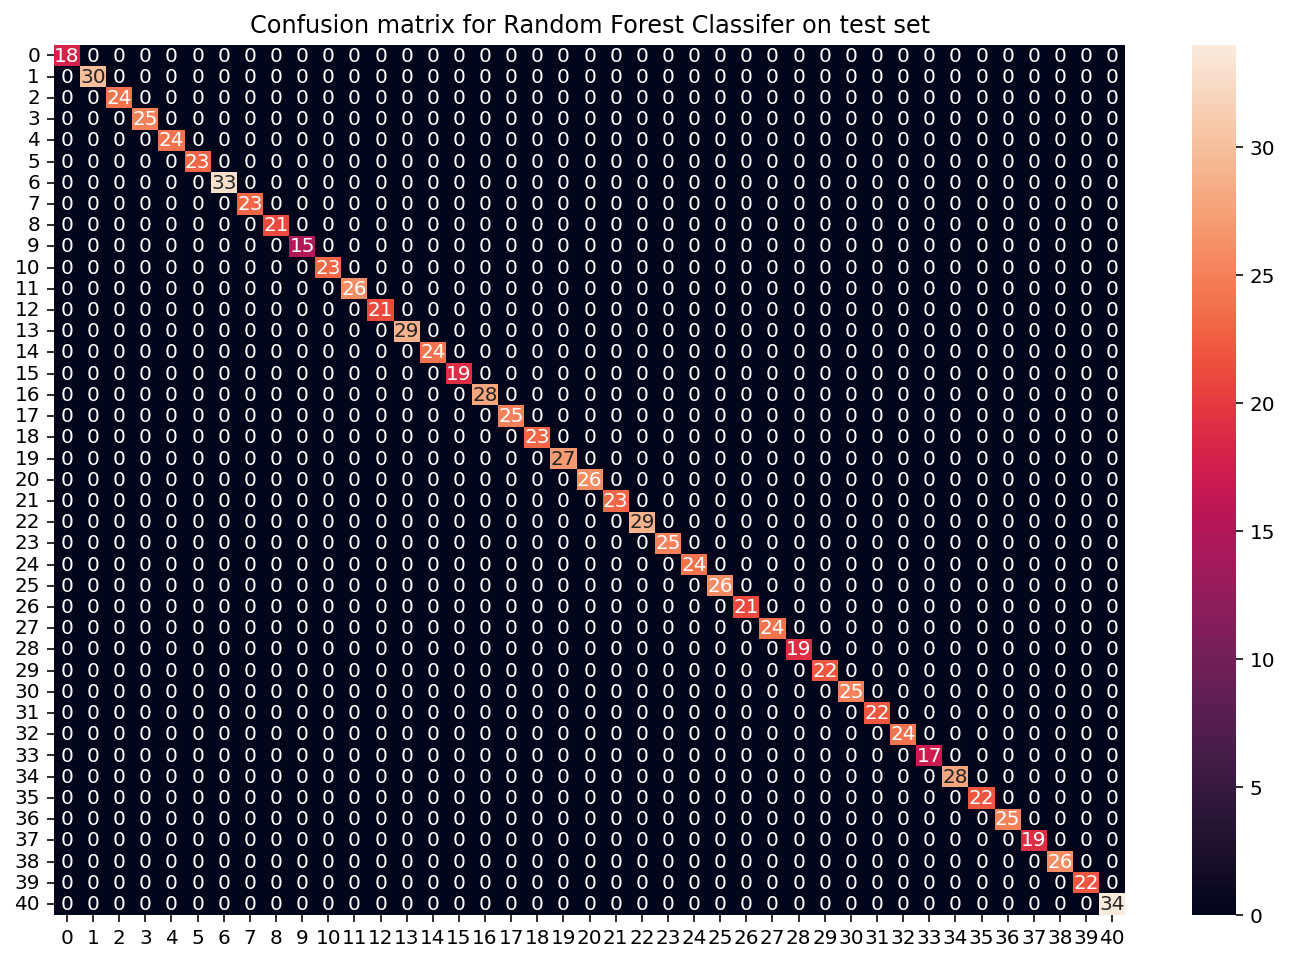

In [50]:
# Combine all models to create one that is more accurate

# Train and test SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(f"Accuracy on train data using SVM Classifier : {accuracy_score(y_train, svm_model.predict(X_train)) * 100}")
print(f"Accuracy on test data using SVM Classifier : {accuracy_score(y_test, pred) * 100}")
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for SVM Classifer on test set")
plt.show()

# Do the same for NB Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)

print(f"Accuracy on train data using Gaussian Naive Bayes Classifier : {accuracy_score(y_train, svm_model.predict(X_train)) * 100}")
print(f"Accuracy on test data using Gaussian Naive Bayes Classifier : {accuracy_score(y_test, pred) * 100}")
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for Gaussian Naive Bayes Classifer on test set")
plt.show()

# For Random Forest
rf_model = RandomForestClassifier(random_state = 43)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print(f"Accuracy on train data using Random Forest Classifier : {accuracy_score(y_train, svm_model.predict(X_train)) * 100}")
print(f"Accuracy on test data using Random Forest Classifier : {accuracy_score(y_test, pred) * 100}")
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for Random Forest Classifer on test set")
plt.show()

Accuracy on the unseen Test dataset by the combined model: 100.0


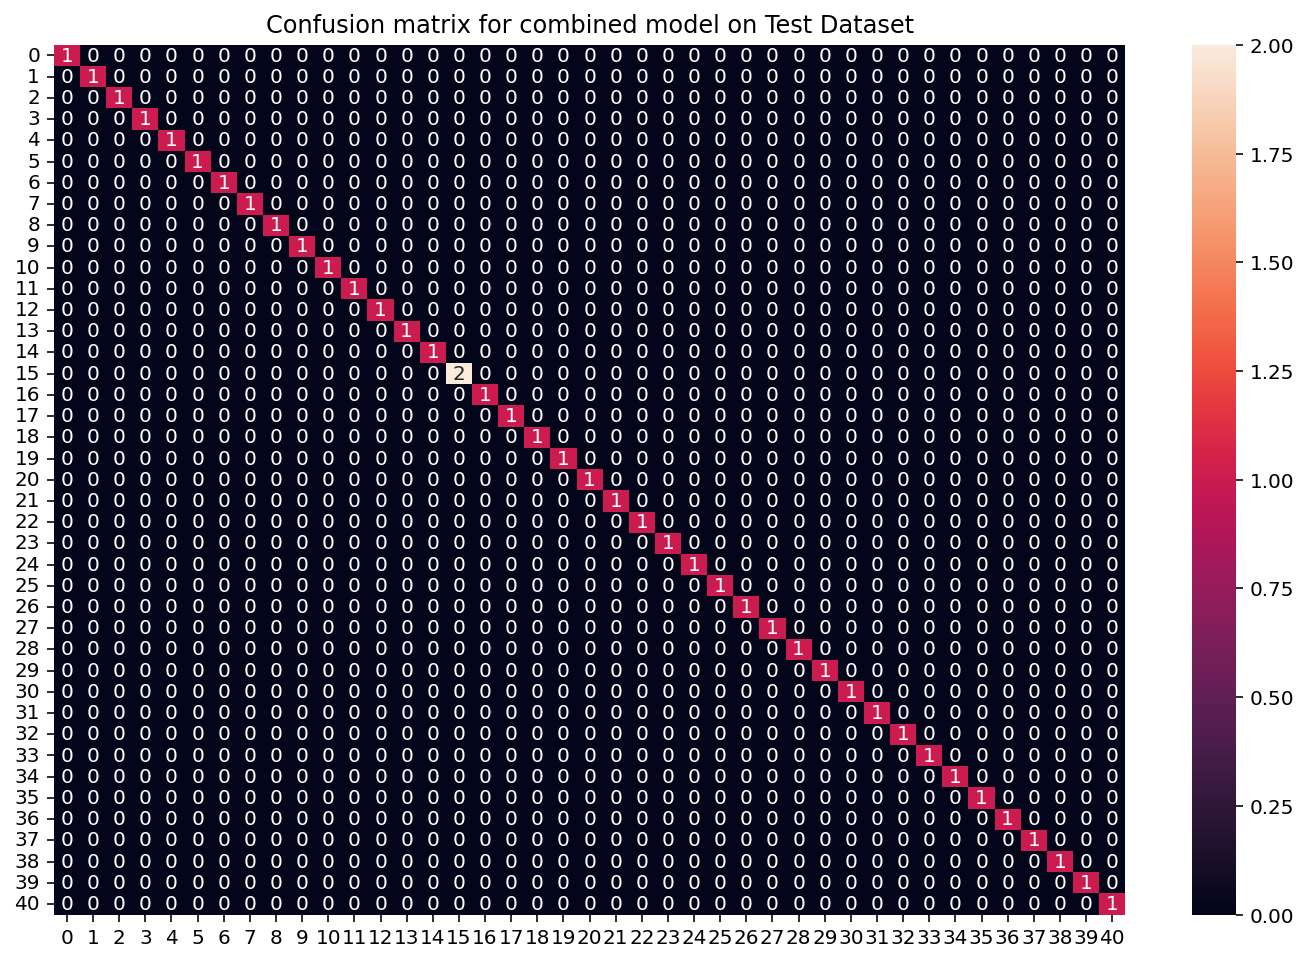

In [56]:
# Here we will fit the models on the whole data, and make a prediction taking the mode of the predictions
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state = 44)

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

X_valid = testing.iloc[:, :-1]
y_valid = testing.iloc[:, -1]

svm_pred = final_svm_model.predict(X_valid)
nb_pred = final_nb_model.predict(X_valid)
rf_pred = final_rf_model.predict(X_valid)

final_pred = [sci.stats.mode([i,j,k])[0][0] for i,j,k in zip(svm_pred, nb_pred, rf_pred)]

print(f"Accuracy on the unseen Test dataset by the combined model: {accuracy_score(y_valid, final_pred) * 100}")

cf_matrix = confusion_matrix(y_valid, final_pred)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for combined model on Test Dataset")
plt.show()